In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


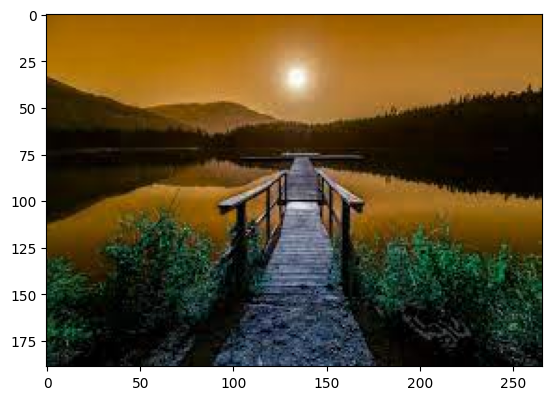

In [3]:
path = "Beautiful_Nature.jpg"
img = cv.imread(path)
#plt.savefig("")
plt.imshow(img)


In [ ]:
# HISTOGRAM EQUALIZATION

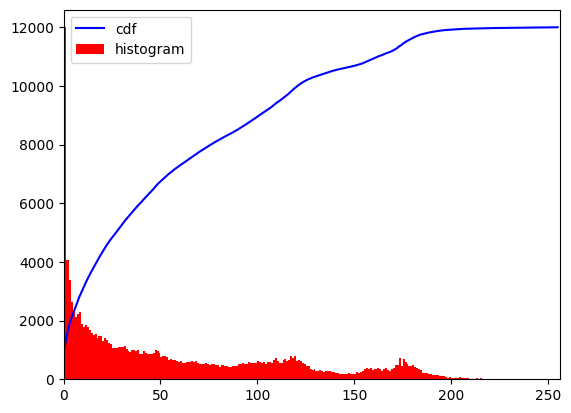

In [4]:


hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
#plt.savefig("./1.Bijesh Thermal Images_Jupyter/Bijesh_Thermal2"
plt.show()


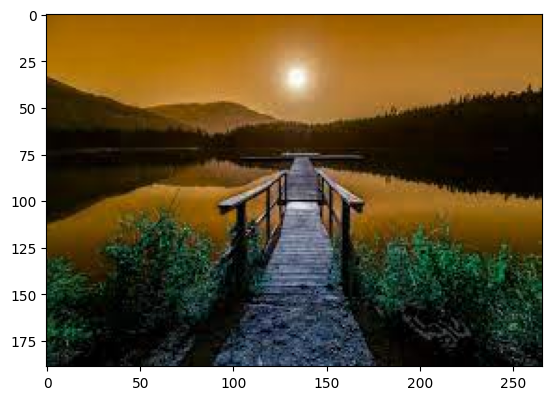

In [5]:


import cv2 
import matplotlib.pyplot as plt
image = cv2.imread(path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2.imshow('Original image', image)
cv2.imshow('Gray image', gray)
#plt.savefig("./1.Bijesh Thermal Images_Jupyter/Bijesh_Thermal3.jpg")
plt.imshow(image)



# GRAYSCALE

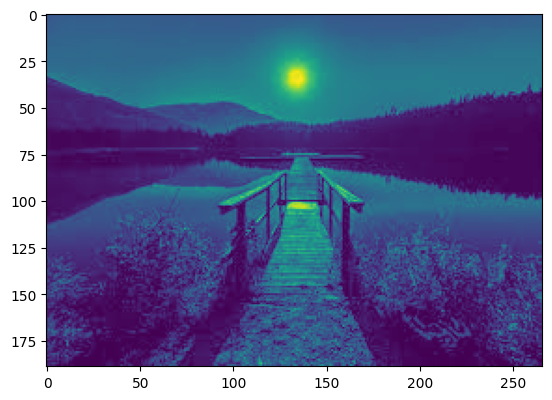

In [6]:
plt.imshow(gray)
#plt.savefig("./1.Bijesh Thermal Images_Jupyter/Bijesh_Thermal4.jpg")


RGB

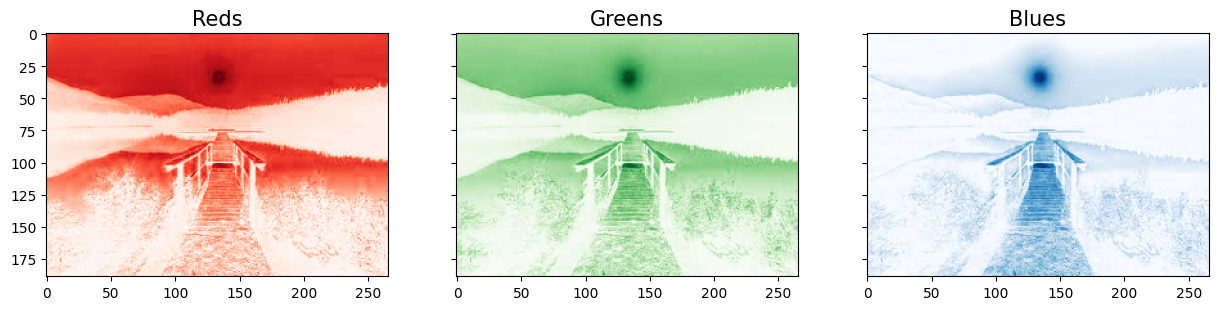

In [7]:
def rgb_splitter(image):
    rgb_list = ['Reds','Greens','Blues']
    fig, ax = plt.subplots(1, 3, figsize=(15,5), sharey = True)
    for i in range(3):
        ax[i].imshow(image[:,:,i], cmap = rgb_list[i])
        ax[i].set_title(rgb_list[i], fontsize = 15)
rgb_splitter(image)
#plt.savefig("./1.Bijesh Thermal Images_Jupyter/Bijesh_RGB.jpg")

# RESIZING

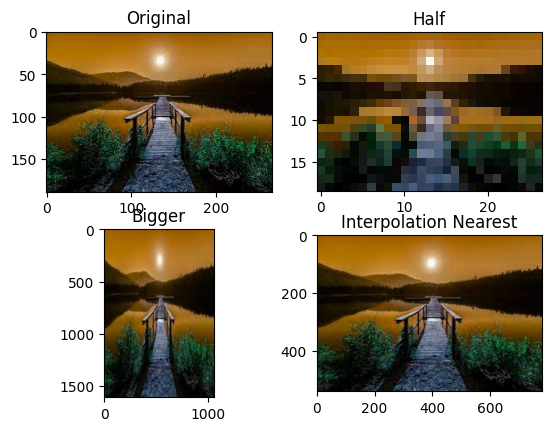

In [8]:
half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1610))
 
stretch_near = cv2.resize(image, (780, 540),
               interpolation = cv2.INTER_NEAREST)
 
 
Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4
 
for i in range(count):
    plt.subplot(2, 2, i + 1)
    plt.title(Titles[i])
    plt.imshow(images[i])
#plt.savefig("./1.Bijesh Thermal Images_Jupyter/Bijesh_Resizing.jpg")
plt.show()

In [9]:
# convert to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [11]:
# reshape the image to a 2D array of pixels and 3 color values (RGB)
pixel_values = image.reshape((-1, 3))
# convert to float
pixel_values = np.float32(pixel_values)

In [12]:
print(pixel_values.shape)

(50274, 3)


In [16]:
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [17]:
# number of clusters (K)
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [18]:
# convert back to 8 bit values
centers = np.uint8(centers)

# flatten the labels array
labels = labels.flatten()

In [19]:
# convert all pixels to the color of the centroids
segmented_image = centers[labels.flatten()]

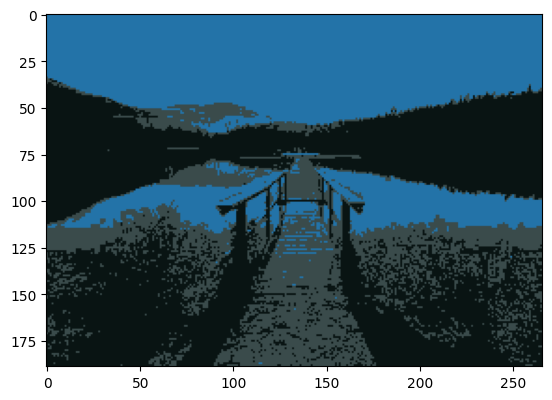

In [20]:
# reshape back to the original image dimension
segmented_image = segmented_image.reshape(image.shape)
#show the image
plt.imshow(segmented_image)
#plt.savefig("./1.Bijesh Thermal Images_Jupyter/Bijesh_K-Mean.jpg")
plt.show()

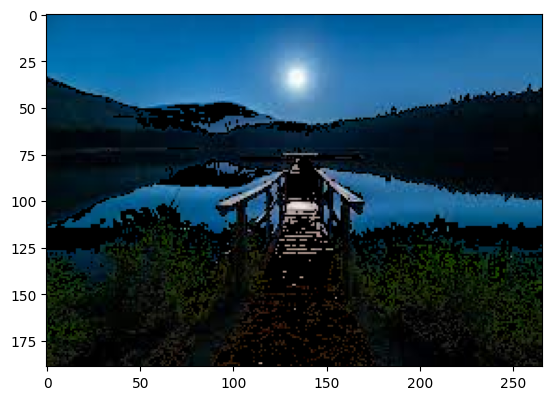

In [21]:
# disable only the cluster number 2 (turn the pixel into black)
masked_image = np.copy(image)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 2
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(image.shape)
# show the image
plt.imshow(masked_image)
#plt.savefig("./1.Bijesh Thermal Images_Jupyter/Bijesh_K-Mean_1.jpg")
plt.show()


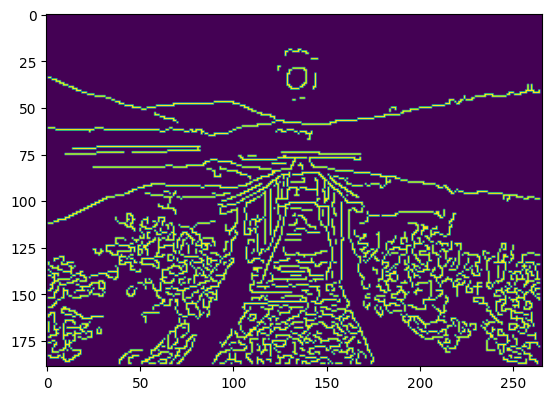

In [23]:
import skimage
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import os
filename = os.path.join(os.getcwd(),path)
from skimage import io
bird =io.imread(filename)
plt.imshow(gray)
from skimage import feature
edges = feature.canny(gray,sigma=1)
#plt.savefig("./1.Bijesh Thermal Images_Jupyter/Bijesh_Feature_Extraction.jpg")
plt.imshow(edges )

# IMAGE TRANSFORMATION METHODS


C:\Users\OM SAI RAM\AppData\Local\Temp\ipykernel_13136\1819743610.py:5: MatplotlibDeprecationWarning: mplDeprecation was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use matplotlib.MatplotlibDeprecationWarning instead.
  warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
C:\Users\OM SAI RAM\AppData\Local\Temp\ipykernel_13136\1819743610.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic=imageio.imread(path)


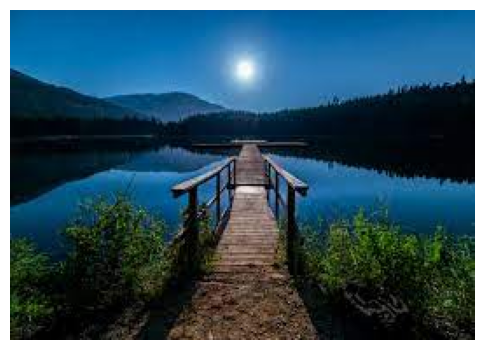

In [24]:
import imageio
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

pic=imageio.imread(path)

plt.figure(figsize=(6,6))
plt.imshow(pic);
plt.axis('off');
#plt.savefig("./1.Bijesh Thermal Images_Jupyter/Bijesh_Image_Transformation.jpg")

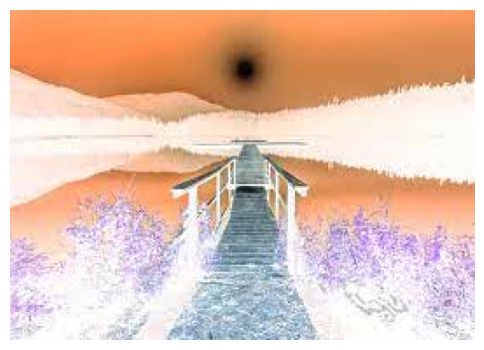

In [25]:
negative =255- pic # neg = (L-1) - img

plt.figure(figsize= (6,6))
plt.imshow(negative);
plt.axis('off');
#plt.savefig("./1.Bijesh Thermal Images_Jupyter/Bijesh_Color_Negative.jpg")

In [26]:
# LOG TRANSFORMATION FOR BLOOD PATCH

C:\Users\OM SAI RAM\AppData\Local\Temp\ipykernel_13136\15760544.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  pic=imageio.imread(path)


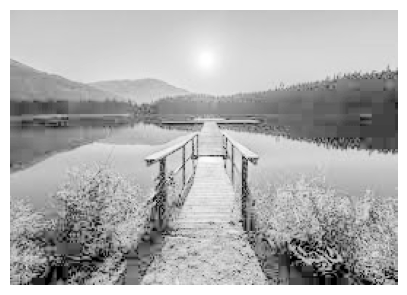

In [27]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

pic=imageio.imread(path)
gray=lambda rgb : np.dot(rgb[...,:3],[0.299,0.587,0.114])
gray=gray(pic)


'''
log transform
-> s = c*log(1+r)

So, we calculate constant c to estimate s
-> c = (L-1)/log(1+|I_max|)

'''


max_=np.max(gray)

def log_transform():
    return(255/np.log(1+max_))*np.log(1+gray)

plt.figure(figsize=(5,5))
plt.imshow(log_transform(),cmap=plt.get_cmap(name='gray'))
plt.axis('off');
#plt.savefig("./1.Bijesh Thermal Images_Jupyter/Bijesh_Log_Transformation.jpg")

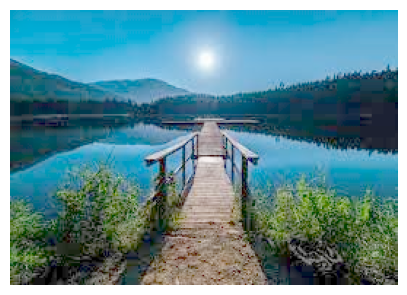

In [29]:
import imageio
import matplotlib.pyplot as plt

# Gamma encoding 
pic=image 
io.imread(path)
gamma=2.2# Gamma < 1 ~ Dark ; Gamma > 1 ~ Bright

gamma_correction=((pic/255)**(1/gamma))
plt.figure(figsize=(5,5))
plt.imshow(gamma_correction)
plt.axis('off');
#plt.savefig("./1.Bijesh Thermal Images_Jupyter/Bijesh_Gamma_Correction.jpg")

HSV

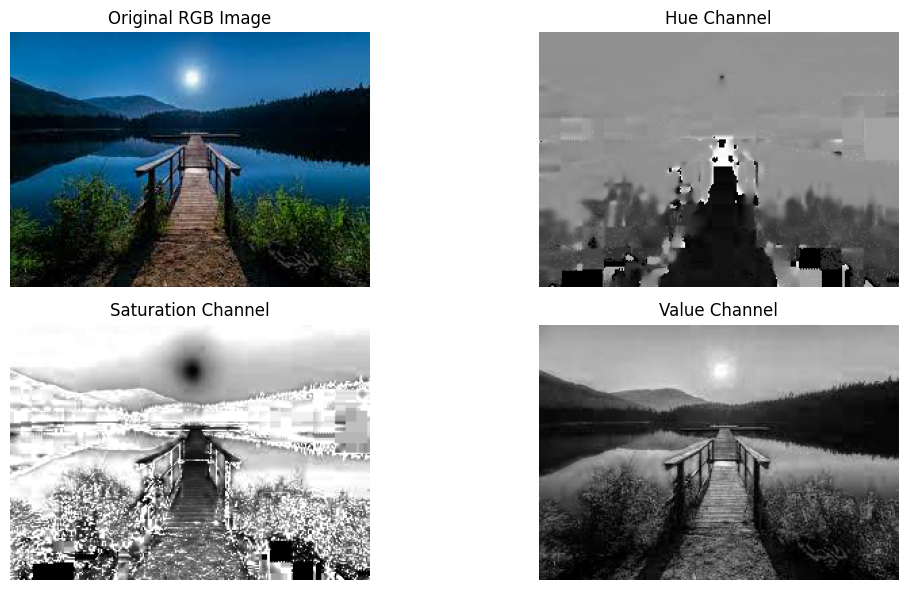

In [30]:
#HSV
import cv2
import matplotlib.pyplot as plt

# Load an image in RGB format
image_path = "Beautiful_Nature.jpg"
image = cv2.imread(image_path)
# Convert RGB image to HSV color space
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Split HSV channels
hue_channel, saturation_channel, value_channel = cv2.split(hsv_image)

# Display the original RGB image and the individual HSV channels
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(hue_channel, cmap="gray")
plt.title("Hue Channel")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(saturation_channel, cmap="gray")
plt.title("Saturation Channel")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(value_channel, cmap="gray")
plt.title("Value Channel")
plt.axis("off")

plt.tight_layout()
plt.show()

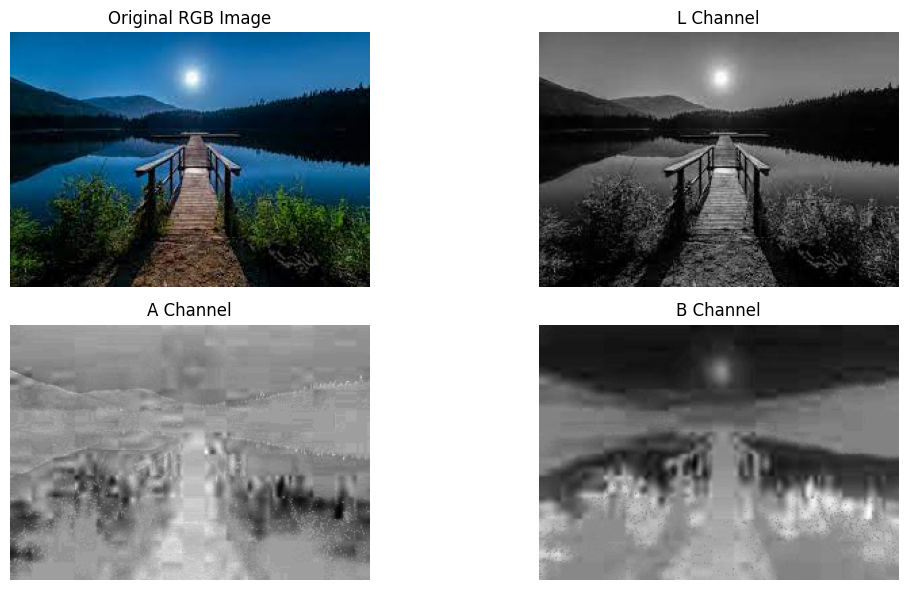

In [31]:
# LAB

# Convert RGB image to LAB color space
lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split LAB channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Display the original RGB image and the individual LAB channels
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(l_channel, cmap="gray")
plt.title("L Channel")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(a_channel, cmap="gray")
plt.title("A Channel")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(b_channel, cmap="gray")
plt.title("B Channel")
plt.axis("off")

plt.tight_layout()
plt.show()


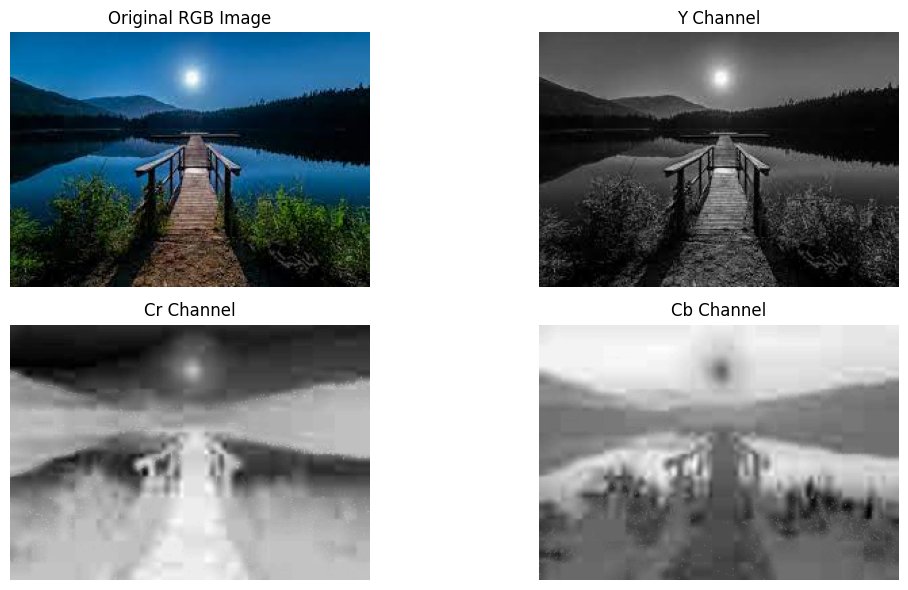

In [32]:
#  YCrCb
# Convert RGB image to YCrCb color space
ycrcb_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)

# Split YCrCb channels
y_channel, cr_channel, cb_channel = cv2.split(ycrcb_image)

# Display the original RGB image and the individual YCrCb channels
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(y_channel, cmap="gray")
plt.title("Y Channel")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(cr_channel, cmap="gray")
plt.title("Cr Channel")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(cb_channel, cmap="gray")
plt.title("Cb Channel")
plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# shape analysis
import cv2
import numpy as np
from skimage import measure

# Load an image
image_path = "Beautiful_Nature.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Threshold the image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate shape features for each contour
for contour in contours:
    # Calculate area
    area = cv2.contourArea(contour)
    
    # Skip contours with zero area
    if area == 0:
        continue
    
    # Calculate perimeter
    perimeter = cv2.arcLength(contour, True)
    
    # Calculate compactness (only if area is non-zero)
    compactness = (perimeter**2) / (4 * np.pi * area)
    
    # Calculate bounding box properties
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    
    # Calculate solidity
    convex_hull = cv2.convexHull(contour)
    hull_area = cv2.contourArea(convex_hull)
    solidity = area / hull_area
    
    # Calculate equivalent diameter
    equivalent_diameter = np.sqrt(4 * area / np.pi)
    
    # Calculate extent
    extent = area / (w * h)
    
    # Calculate orientation if the contour has at least 5 points
    if len(contour) >= 5:
        (x, y), (major_axis, minor_axis), angle = cv2.fitEllipse(contour)
        print("Orientation:", angle)
    else:
        print("Orientation: Not enough points for ellipse fitting")
    
    print("Area:", area)
    print("Perimeter:", perimeter)
    print("Compactness:", compactness)
    print("Aspect Ratio:", aspect_ratio)
    print("Solidity:", solidity)
    print("Equivalent Diameter:", equivalent_diameter)
    print("Extent:", extent)
    print("\n")

# Display the original image
cv2.imshow("Original Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()


Orientation: 0.0
Area: 1.0
Perimeter: 6.828427076339722
Compactness: 3.710491896809875
Aspect Ratio: 0.5
Solidity: 0.6666666666666666
Equivalent Diameter: 1.1283791670955126
Extent: 0.125


Orientation: Not enough points for ellipse fitting
Area: 1.0
Perimeter: 10.828427076339722
Compactness: 9.33084313251306
Aspect Ratio: 3.0
Solidity: 0.4
Equivalent Diameter: 1.1283791670955126
Extent: 0.08333333333333333


Orientation: 0.0
Area: 0.5
Perimeter: 8.242640614509583
Compactness: 10.813165771559984
Aspect Ratio: 2.0
Solidity: 0.25
Equivalent Diameter: 0.7978845608028654
Extent: 0.0625


Orientation: 0.0
Area: 3.0
Perimeter: 21.656854152679443
Compactness: 12.441124176684081
Aspect Ratio: 5.0
Solidity: 0.3333333333333333
Equivalent Diameter: 1.9544100476116797
Extent: 0.15


Orientation: 93.84761047363281
Area: 10.0
Perimeter: 40.14213538169861
Compactness: 12.823042407816116
Aspect Ratio: 3.75
Solidity: 0.3389830508474576
Equivalent Diameter: 3.5682482323055424
Extent: 0.16666666666666666

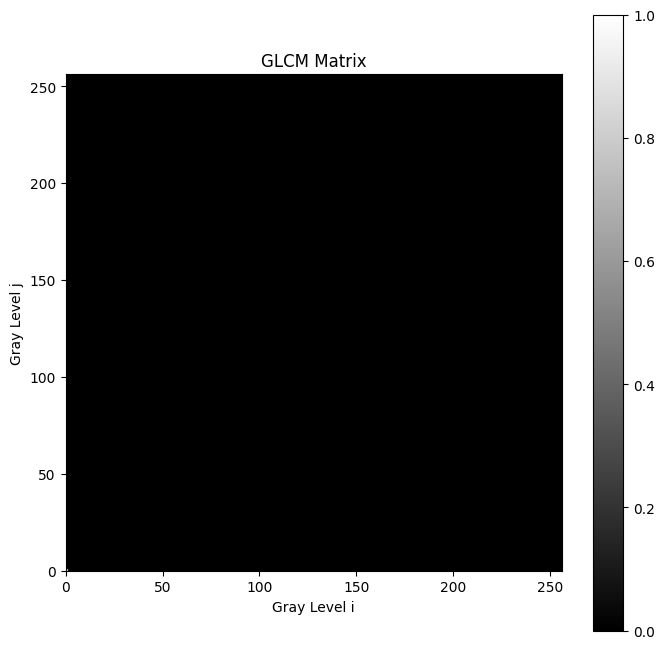

GLCM Properties:
Contrast: 2.3283064365386963e-10
Dissimilarity: 1.52587890625e-05
Homogeneity: 0.9999847414437646
Energy: 1.0
Correlation: 1.5259021896696422e-05


In [5]:
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt

# Load an image (replace 'image.jpg' with your image file)
image_path = 'Beautiful_Nature.jpg'
image = io.imread(image_path)

# Convert the image to grayscale
gray_image = color.rgb2gray(image)

# Define the number of gray levels (usually 256 for 8-bit images)
gray_levels = 256

# Initialize the GLCM matrix
glcm = np.zeros((gray_levels, gray_levels))

# Define the distance and angle for texture comparison
distance = 1
angle = np.pi / 4  # 45 degrees

# Iterate through the image to populate the GLCM matrix
for i in range(gray_levels):
    for j in range(gray_levels):
        x_offset = int(distance * np.cos(angle))
        y_offset = int(distance * np.sin(angle))
        
        for x in range(gray_image.shape[0] - abs(x_offset)):
            for y in range(gray_image.shape[1] - abs(y_offset)):
                if gray_image[x, y] == i and gray_image[x + x_offset, y + y_offset] == j:
                    glcm[i, j] += 1

# Normalize the GLCM matrix
glcm /= np.sum(glcm)

# Plot the GLCM matrix as an image
plt.figure(figsize=(8, 8))
plt.imshow(glcm, cmap='gray', origin='lower', extent=(0, gray_levels, 0, gray_levels))
plt.title('GLCM Matrix')
plt.xlabel('Gray Level i')
plt.ylabel('Gray Level j')
plt.colorbar()
plt.show()

# Compute GLCM properties
contrast = np.sum((np.arange(gray_levels) - np.mean(glcm))**2 * glcm)
dissimilarity = np.sum(np.abs(np.arange(gray_levels) - np.mean(glcm)) * glcm)
homogeneity = np.sum(glcm / (1 + np.abs(np.arange(gray_levels) - np.mean(glcm))))
energy = np.sum(glcm**2)
correlation = np.sum((np.arange(gray_levels) - np.mean(glcm))**2 * glcm) / (np.std(glcm)**2)

# Display GLCM properties
print("GLCM Properties:")
print(f"Contrast: {contrast}")
print(f"Dissimilarity: {dissimilarity}")
print(f"Homogeneity: {homogeneity}")
print(f"Energy: {energy}")
print(f"Correlation: {correlation}")


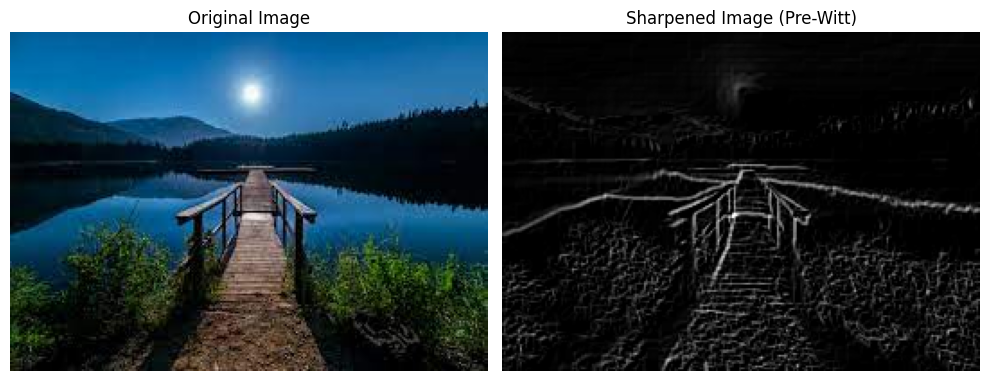

In [6]:
# prewitt Sharpening

import cv2
import numpy as np
import matplotlib.pyplot as plt

def prewitt_sharpening(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply the Pre-Witt sharpening filter
    kernel_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    
    sharpened_x = cv2.filter2D(gray_image, -1, kernel_x)
    sharpened_y = cv2.filter2D(gray_image, -1, kernel_y)
    
    sharpened_image = cv2.addWeighted(sharpened_x, 0.5, sharpened_y, 0.5, 0)
    
    return sharpened_image

# Load the image
image_path = 'Beautiful_Nature.jpg'  # Replace with the actual path
original_image = cv2.imread(image_path)

# Apply Pre-Witt sharpening
sharpened_image = prewitt_sharpening(original_image)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image (Pre-Witt)')
plt.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# scharr sharpening
import cv2
import numpy as np
import matplotlib.pyplot as plt

def scharr_sharpening(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply the Scharr sharpening filter
    scharr_x = cv2.Scharr(gray_image, cv2.CV_64F, 1, 0)
    scharr_y = cv2.Scharr(gray_image, cv2.CV_64F, 0, 1)
    
    sharpened_image = cv2.addWeighted(gray_image.astype(np.float64), 1, scharr_x, 0.5, 0)
    sharpened_image = cv2.addWeighted(sharpened_image, 1, scharr_y, 0.5, 0)
    
    sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)
    
    return sharpened_image

# Load the image
image_path = 'Beautiful_Nature.jpg'  # Replace with the actual path
original_image = cv2.imread(image_path)

# Apply Scharr sharpening
sharpened_image = scharr_sharpening(original_image)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image (Scharr)')
plt.axis('off')

plt.tight_layout()
plt.show()


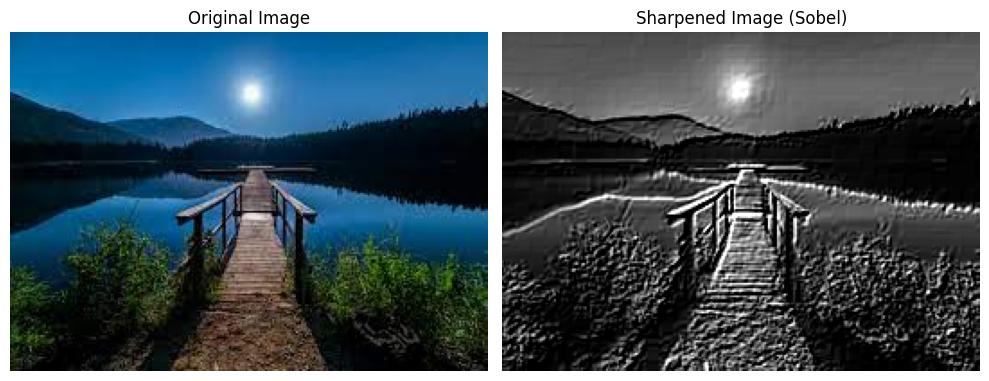

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_sharpening(image):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply the Sobel sharpening filter
    sobel_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    
    sharpened_image = cv2.addWeighted(gray_image.astype(np.float64), 1, sobel_x, 0.5, 0)
    sharpened_image = cv2.addWeighted(sharpened_image, 1, sobel_y, 0.5, 0)
    
    sharpened_image = np.clip(sharpened_image, 0, 255).astype(np.uint8)
    
    return sharpened_image

# Load the image
image_path = 'Beautiful_Nature.jpg'  # Replace with the actual path
original_image = cv2.imread(image_path)

# Apply Sobel sharpening
sharpened_image = sobel_sharpening(original_image)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image (Sobel)')
plt.axis('off')

plt.tight_layout()
plt.show()


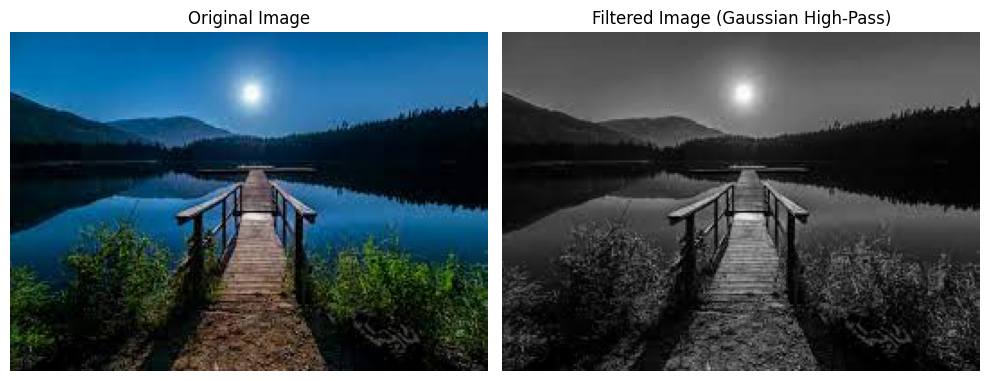

In [8]:
# Gaussian High  pass Filter
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_high_pass_filter(image, cutoff_frequency):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Fourier Transform
    f_transform = np.fft.fft2(gray_image)
    
    # Shift the zero frequency components to the center
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    # Calculate the center frequency indices
    rows, cols = gray_image.shape
    center_row, center_col = rows // 2, cols // 2
    
    # Create a Gaussian filter
    gaussian_filter = np.zeros_like(gray_image)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            gaussian_filter[i, j] = np.exp(-0.5 * ((distance / cutoff_frequency) ** 2))
    
    # Apply the high-pass filter
    filtered_spectrum = f_transform_shifted * (1 - gaussian_filter)
    
    # Inverse Fourier Transform
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum)).real
    
    return filtered_image

# Load the image
image_path = 'Beautiful_Nature.jpg'  # Replace with the actual path
original_image = cv2.imread(image_path)

# Set the cutoff frequency (adjust this value based on your needs)
cutoff_frequency = 20

# Apply Gaussian High-Pass Filter
filtered_image = gaussian_high_pass_filter(original_image, cutoff_frequency)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Gaussian High-Pass)')
plt.axis('off')

plt.tight_layout()
plt.show()


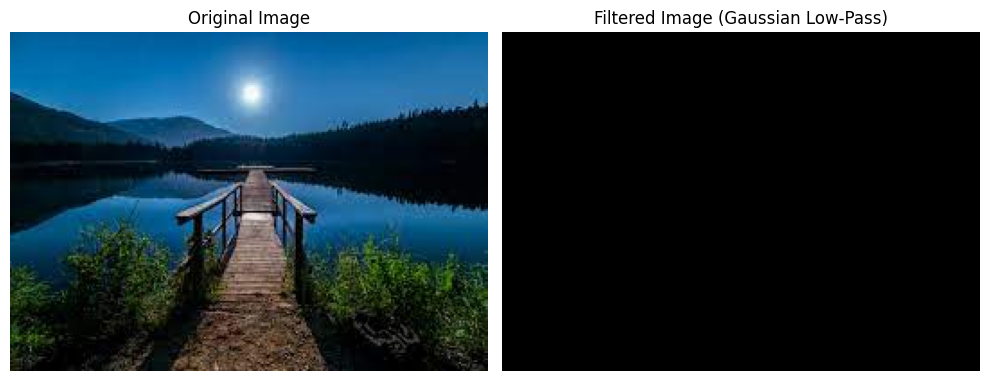

In [9]:
# Gaussian low pass Filter

import cv2
import numpy as np
import matplotlib.pyplot as plt

def gaussian_low_pass_filter(image, cutoff_frequency):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Fourier Transform
    f_transform = np.fft.fft2(gray_image)
    
    # Shift the zero frequency components to the center
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    # Calculate the center frequency indices
    rows, cols = gray_image.shape
    center_row, center_col = rows // 2, cols // 2
    
    # Create a Gaussian filter
    gaussian_filter = np.zeros_like(gray_image)
    for i in range(rows):
        for j in range(cols):
            distance = np.sqrt((i - center_row) ** 2 + (j - center_col) ** 2)
            gaussian_filter[i, j] = np.exp(-0.5 * ((distance / cutoff_frequency) ** 2))
    
    # Apply the low-pass filter
    filtered_spectrum = f_transform_shifted * gaussian_filter
    
    # Inverse Fourier Transform
    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_spectrum)).real
    
    return filtered_image

# Load the image
image_path = 'Beautiful_Nature.jpg'  # Replace with the actual path
original_image = cv2.imread(image_path)

# Set the cutoff frequency (adjust this value based on your needs)
cutoff_frequency = 20

# Apply Gaussian Low-Pass Filter
filtered_image = gaussian_low_pass_filter(original_image, cutoff_frequency)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Gaussian Low-Pass)')
plt.axis('off')

plt.tight_layout()
plt.show()


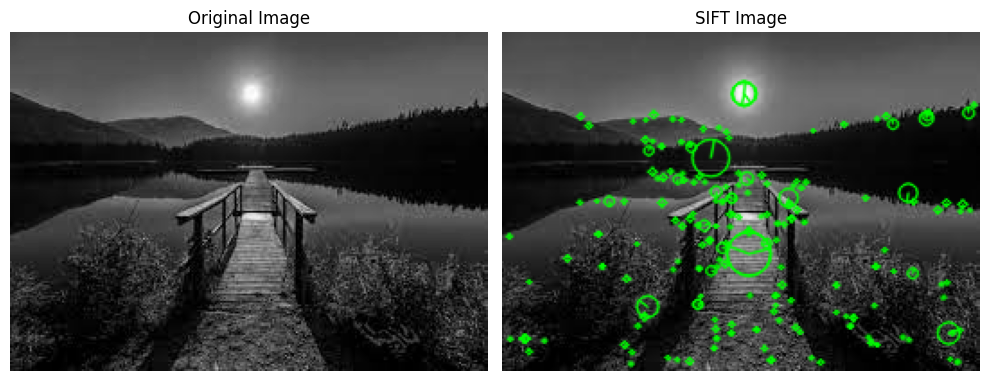

In [10]:
#  SIFT (Scale-Invariant Feature Transform)
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image
image_path = 'Beautiful_Nature.jpg'  # Replace with the actual path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Create SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(image, None)

# Draw keypoints on the image
image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, (0, 255, 0), 4)

# Display the original image and image with keypoints
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Image')
plt.axis('off')

plt.tight_layout()
plt.show()

